In [4]:
import os
import cv2
import numpy as np

In [66]:
# define a function to read  and reconstruct the YUV file and return the list of frames
# def read_yuv(filename, width, height):
#     #open the file
#     f = open(filename, 'rb')
#     #read the file
#     data = f.read()
#     #close the file
#     f.close()
#     #get the number of frames
#     nframes = len(data) // (width * height * 3 // 2)
#     #create a list to store the frames
#     frames = []
#     #loop through the frames
#     for i in range(nframes):
#         #get the Y component
#         Y = np.frombuffer(data, dtype=np.uint8, count=width * height, offset=i * width * height * 3 // 2)
#         #get the U component
#         U = np.frombuffer(data, dtype=np.uint8, count=width * height // 4, offset=i * width * height * 3 // 2 + width * height)
#         #get the V component
#         V = np.frombuffer(data, dtype=np.uint8, count=width * height // 4, offset=i * width * height * 3 // 2 + width * height * 5 // 4)
#         #reshape the Y component
#         Y = Y.reshape((height, width))
#         #reshape the U component
#         U = U.reshape((height // 2, width // 2))
#         #reshape the V component
#         V = V.reshape((height // 2, width // 2))
#         #create a list to store the YUV components
#         yuv = [Y, U, V]
#         #append the list to the frames list
#         frames.append(yuv)
#     #return the list of frames
#     return frames


In [5]:
def read_YUV(filename, size):

    height, width = size
    frame_len = width * height * 3 // 2
    shape = (int(height * 1.5), width)

    frames = []
    with open(filename, "rb") as file:
        while True:
            try:
                raw = file.read(frame_len)
                yuv = np.frombuffer(raw, dtype=np.uint8)
                yuv = yuv.reshape(shape)

                img = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR_I420, 3)
                frames.append(img)
            except:
                break

    return frames


In [6]:
#assign the path "./input/bs1_25fps.yuv" to the variable filename
filename = "./input/bs1_25fps.yuv"



In [7]:
#store the literals 768 and 432 in the variables width and height respectively
width = 768
height = 432

In [8]:
#read the YUV file and store the frames in the list frames
frames = read_YUV(filename, (height, width))

#print the number of frames
print(len(frames))


217


In [9]:
#store the frames in the directory "./input/frames" and create if not exists
os.makedirs("./input/frames", exist_ok=True)
#assign the path to the variable path
path = "./input/frames"

#loop through the frames and save in the path directory with the name {index}.jpg index with 3 digits starting from 1
for index, frame in enumerate(frames):
    cv2.imwrite(f"{path}/{index+1:03d}.jpg", frame)


    








In [72]:
# #funtion which read the images from the path and creates a H.264 video with the specified bitrate
# #with one I frame and rest P frames and save it in the directory "./input/video" and create the directory if not exists
# def create_video(path, bitrate):
#     #create a list to store the images
#     frames = []
#     #create the directory if not exists 
#     os.makedirs("./input/video", exist_ok=True)
#     #create the path with bitrate
#     target_file_name = os.path.join("./input/video", f"video_{bitrate}.mp4")
    
#     #loop through the images in the path directory
#     for image in os.listdir(path):
#         #read the image
#         frame = cv2.imread(os.path.join(path, image))
#         #append the frame to the frames list
#         frames.append(frame)
#     #create a VideoWriter object with the specified bitrate
    
#     video = cv2.VideoWriter(target_file_name, cv2.VideoWriter_fourcc(*"H264"), 25, (width, height), True)
#     #write the first frame as I frame
#     video.write(frames[0])
#     #loop through the rest of the frames and write them as P frames
#     for frame in frames[1:]:
#         video.write(frame)
#     #release the VideoWriter object
#     video.release()
    
    
    

In [73]:
#funtion which read the images from the path and creates a H.264 video with the specified bitrate
#with one I frame and rest P frames and save it in the directory "./input/video" 

In [74]:
#call the function with the path and bitrate 100
# create_video(path, 1000)

In [10]:
path

'./input/frames'

In [76]:
#  #create a list to store the frames
# frames = []
# #loop through the images in the path directory
# for image in os.listdir(path):
#     #read the image
#     frame = cv2.imread(os.path.join(path, image))
#     #append the frame to the frames list
#     frames.append(frame)
# #create a VideoWriter object with the specified bitrate
# video = cv2.VideoWriter("./input/check.mp4", cv2.VideoWriter_fourcc(*"H264"), 25, (width, height), True)
# #write the first frame as I frame
# video.write(frames[0])
# #loop through the rest of the frames and write them as P frames
# for frame in frames[1:]:
#     video.write(frame)
# #release the VideoWriter object
# video.release()
    

In [11]:
total_frames = len(os.listdir(path))
BITRATE_START = 100
BITRATE_END = 1001
BITRATE_STEP = 100


In [18]:
def create_h264(in_path, out_path):
    for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
            os.system(
            f"ffmpeg -hide_banner -loglevel panic -i {in_path}/%03d.jpg -b:v {bitrate}k -c:v libx264 "
            f"-x264-params keyint=1:min-keyint=1:no-scenecut=1:bframes=0 -c:a copy -y "
            f"{out_path}/{bitrate}.h264"
        )


        # Check the frame types and print stats for the compressed file
            frame_details = os.popen(
            f"ffprobe -hide_banner -loglevel panic -show_frames "
            f"{out_path}/{bitrate}.h264 | Findstr pict_type"
        )

            I_frame_count = 0
            P_Frame_count = 0
            for line in frame_details:
                type = line.rstrip().split("=")[-1]

                if type == "I":
                    I_frame_count += 1
                else:
                    P_Frame_count += 1

            print(f"I Frame Count: {I_frame_count}, P Frame Count: {P_Frame_count}, Total Frames: {total_frames}")


#create a temp_path 
in_path = "./input/frames"
out_path = "./output_part2/h264_format_compressed"     
#create the directory if not exists
os.makedirs(out_path, exist_ok=True)       
#create the h264 video
create_h264(in_path,out_path)

I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217


In [19]:
#create the path_compressed for the compressed files
path_compressed = "./output_part2/h264_format_compressed"

Decompress the frames from the H264 format

In [20]:
#decompress the compressed file
#loop through the bitrates
for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
    #create the path for the decompressed files and create the directory if not exists
    os.makedirs("./output_part2/h264_format_decompressed", exist_ok=True)
    #make the directories for each bitrate if not exists
    os.makedirs(os.path.join("./output_part2/h264_format_decompressed", str(bitrate)), exist_ok=True)
    #make the directory for each bitrate in compressed path
    # os.makedirs(os.path.join(path_compressed, str(bitrate)), exist_ok=True)
    #create the path for the decompressed files
    path_decompressed = os.path.join("./output_part2/h264_format_decompressed", str(bitrate))
    #ffmpeg command to decompress the file
    os.system(
            f"ffmpeg -hide_banner -loglevel panic -i "
            f"{path_compressed}/{bitrate}.h264"
            f" -qscale:v 2 {path_decompressed}/%03d.jpg"
        )


Now calculate the MSE between the original frames and the extracted frames from various birates in Y channel

In [22]:
#save the original_path as the path for the original frames
original_path = path
#loop through the bitrates  
original_path

'./input/frames'

In [23]:
#function to calculate the MSE between the original and the decompressed frames
def calculate_MSE(original_path, decompressed_path):
    #create a list to store the original frames
    original_frames = []
    #create a list to store the decompressed frames
    decompressed_frames = []
    #loop through the original frames
    for image in os.listdir(original_path):
        #read the image
        frame = cv2.imread(os.path.join(original_path, image))
        #append the frame to the original_frames list
        original_frames.append(frame)
    #loop through the decompressed frames
    for image in os.listdir(decompressed_path):
        #read the image
        frame = cv2.imread(os.path.join(decompressed_path, image))
        #append the frame to the decompressed_frames list
        decompressed_frames.append(frame)
    #create a list to store the MSE values
    MSE_values = []
    #loop through the original and decompressed frames
    for original_frame, decompressed_frame in zip(original_frames, decompressed_frames):
        #change the format from bgr to yuv
        original_frame = cv2.cvtColor(original_frame, cv2.COLOR_BGR2YUV)
        decompressed_frame = cv2.cvtColor(decompressed_frame, cv2.COLOR_BGR2YUV)

        #extract the Luma component
        original_frame = original_frame[:, :, 0]
        decompressed_frame = decompressed_frame[:, :, 0]

        #calculate the MSE
        MSE = np.mean((original_frame - decompressed_frame) ** 2)
        #append the MSE to the MSE_values list
        MSE_values.append(MSE)
    #return the MSE_values list
    #add the MSE values of all the frames and divide by the total number of frames if not zero
    return sum(MSE_values) / len(MSE_values) if len(MSE_values) != 0 else 0



In [24]:
#loop through the bitrates
for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
    #create the path for the decompressed files
    decompressed_path = os.path.join("./output_part2/h264_format_decompressed", str(bitrate))
    #call the function to calculate the MSE
    MSE = calculate_MSE(original_path, decompressed_path)
    #print the MSE
    print(f"MSE for {bitrate} is {MSE}")
    

MSE for 100 is 98.32948196184562
MSE for 200 is 83.99156029319208
MSE for 300 is 73.52121049636062
MSE for 400 is 66.1088379656298
MSE for 500 is 61.74176808426852
MSE for 600 is 58.90532498246559
MSE for 700 is 57.01179267139766
MSE for 800 is 55.501401159118664
MSE for 900 is 54.431800788028234
MSE for 1000 is 53.19856954178399


Graph for plotting MSE vs Bitrate

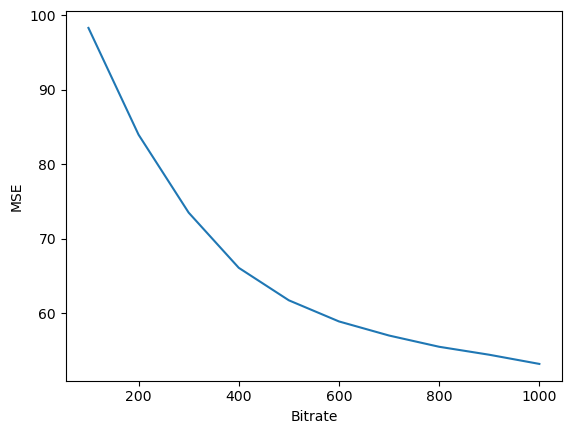

In [25]:
import matplotlib.pyplot as plt


#plot the graph for the MSE 
#list to store the bitrates
bitrates = []
#list to store the MSE values
MSE_values = []
#loop through the bitrates
for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
    #create the path for the decompressed files
    decompressed_path = os.path.join("./output_part2/h264_format_decompressed", str(bitrate))
    #call the function to calculate the MSE
    MSE = calculate_MSE(original_path, decompressed_path)
    #append the bitrates and MSE values to the lists
    bitrates.append(bitrate)
    MSE_values.append(MSE)
#plot the graph
plt.plot(bitrates, MSE_values)
plt.xlabel("Bitrate")
plt.ylabel("MSE")
plt.show()



Downsampling the file and then compressing

In [26]:
#print the length of frames
print(len(frames))

217


In [27]:
#downsample the frames to downsampled_frames
downsampled_frames = []
#loop through the frames
for frame in frames:
    #downsample the frame
    downsampled_frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
    #append the downsampled frame to the downsampled_frames list
    downsampled_frames.append(downsampled_frame)


In [28]:
#save the downsampled_frames to the path_downsampled
path_downsampled = "./input/downsampled/"
#create the directory if not exists
os.makedirs(path_downsampled, exist_ok=True)
#save the downsampled frames to the path_downsampled
for i, frame in enumerate(downsampled_frames):
    cv2.imwrite(os.path.join(path_downsampled, f"{i:03}.jpg"), frame)


In [29]:
#count the total frames in the directory
total_frames = len(os.listdir(path_downsampled))
total_frames


217

Doing the same operation as done with the original. ffmpeg to create H.264 format and save it

In [30]:
in_path = path_downsampled
out_path = "./output_part2/h264_format_downsampled"
#create the directory if not exists
os.makedirs(out_path, exist_ok=True)
create_h264(in_path, out_path)

I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217
I Frame Count: 217, P Frame Count: 0, Total Frames: 217


In [31]:
path_compressed

'./output_part2/h264_format_compressed'

Decompressing the frames from the H264 format

In [32]:
path_compressed = "./output_part2/h264_format_downsampled"
for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
    #create the path for the decompressed files and create the directory if not exists
    os.makedirs("./output_part2/h264_format_downsample_decompressed", exist_ok=True)
    #make the directories for each bitrate if not exists
    os.makedirs(os.path.join("./output_part2/h264_format_downsample_decompressed", str(bitrate)), exist_ok=True)
    #make the directory for each bitrate in compressed path
    # os.makedirs(os.path.join(path_compressed, str(bitrate)), exist_ok=True)
    #create the path for the decompressed files
    path_decompressed = os.path.join("./output_part2/h264_format_downsample_decompressed", str(bitrate))
    #ffmpeg command to decompress the file
    os.system(
            f"ffmpeg -hide_banner -loglevel panic -i "
            f"{path_compressed}/{bitrate}.h264"
            f" -qscale:v 2 {path_decompressed}/%03d.jpg"
        )

UPSAMPLE THE EXTRACTED FRAMES

In [33]:
def load_frames(path):

    #load the jpg images in the directory path
    
    frames = []
    for image in os.listdir(path):
        #read the image
        frame = cv2.imread(os.path.join(path, image))   
        #append the frame to the frames list
        frames.append(frame)
    #return the frames list
    return frames


In [34]:
#loop through the bitrates
for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
    #load the frames from the directory
    frames = load_frames(os.path.join("./output_part2/h264_format_downsample_decompressed", str(bitrate)))
    #upsample the frames to upsampled_frames
    upsampled_frames = []
    #loop through the frames
    for frame in frames:
        #upsample the frame
        upsampled_frame = cv2.resize(frame, (0, 0), fx=2, fy=2)
        #append the upsampled frame to the upsampled_frames list
        upsampled_frames.append(upsampled_frame)
    #save the upsampled_frames to the path_upsampled with bitrate
    path_upsampled = os.path.join("./output_part2/h264_format_downsample_decompressed_upsampled", str(bitrate))
    #create the directory if not exists
    os.makedirs(path_upsampled, exist_ok=True)
    #save the upsampled frames to the path_upsampled
    for i, frame in enumerate(upsampled_frames):
        cv2.imwrite(os.path.join(path_upsampled, f"{i:03}.jpg"), frame)
        
    
    

Calculating the MSE for the downsampled frames

In [35]:
#calculate the MSE for the upsampled frames against the original frames
#loop through the bitrates
for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
    #create the path for the decompressed files
    decompressed_path = os.path.join("./output_part2/h264_format_downsample_decompressed_upsampled", str(bitrate))
    #call the function to calculate the MSE
    MSE = calculate_MSE(original_path, decompressed_path)
    #print the MSE
    print(f"MSE for {bitrate} is {MSE}")
    

MSE for 100 is 83.20420248562577
MSE for 200 is 65.37256337183356
MSE for 300 is 60.592131590866245
MSE for 400 is 58.39787124153723
MSE for 500 is 56.636678900227345
MSE for 600 is 55.18689155828192
MSE for 700 is 53.90999910105357
MSE for 800 is 52.762165153569846
MSE for 900 is 51.764320124821346
MSE for 1000 is 50.831129303386525


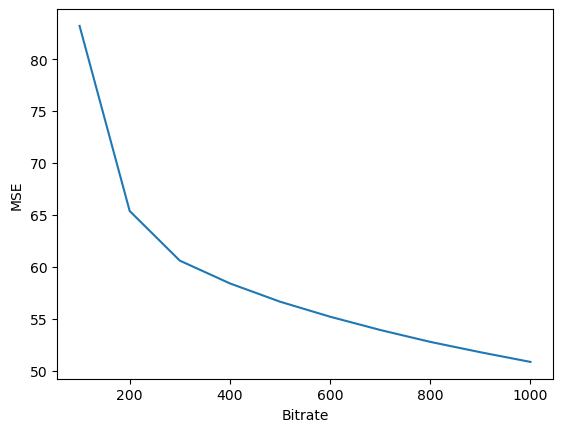

In [36]:
#plot the graph for the MSE
#list to store the bitrates
bitrates = []
#list to store the MSE values
MSE_values = []
#loop through the bitrates
for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):
    #create the path for the decompressed files
    decompressed_path = os.path.join("./output_part2/h264_format_downsample_decompressed_upsampled", str(bitrate))
    #call the function to calculate the MSE
    MSE = calculate_MSE(original_path, decompressed_path)
    #append the bitrates and MSE values to the lists
    bitrates.append(bitrate)
    MSE_values.append(MSE)
#plot the graph
plt.plot(bitrates, MSE_values)
plt.xlabel("Bitrate")
plt.ylabel("MSE")
plt.show()


In [37]:
#calculate the PSNR for the upsampled frames against the original frames
#loop through the bitrates

#assigning the paths
path_frames_original = ".\input\frames"
path_frames_first_case = ".output_part2\h264_format_decompressed"
path_frames_second_case_without_upsampling = ".output_part2\h264_format_downsample_decompressed"
path_frames_second_case_with_upsampling = ".output_part2\h264_format_downsample_decompressed_upsampled"


for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):

    os.system(
        f"FFREPORT=file={path_frames_first_case}/{bitrate}/{bitrate}_psnr.csv:level=32 ffmpeg -hide_banner -loglevel panic "
        f"-i {path_frames_original}/%03d.jpg"
        f" -i {path_frames_first_case}/{bitrate}/%03d.jpg "
        f"-filter_complex psnr -f null -")

    os.system(
        f"FFREPORT=file={path_frames_first_case}/{bitrate}/{bitrate}_vmaf.log:level=32 ffmpeg -hide_banner -loglevel panic "
        f"-i {path_frames_original}/%03d.jpg"
        f"-i {path_frames_first_case}/{bitrate}/%03d.jpg "
        f"-filter_complex libvmaf -f null -")

    os.system(
        f"FFREPORT=file={path_frames_second_case_with_upsampling}/{bitrate}/{bitrate}_psnr.log:level=32 ffmpeg -hide_banner -loglevel panic "
        f"-i {path_frames_original}/%03d.jpg"
        f" -i {path_frames_second_case_with_upsampling}/{bitrate}/%03d.jpg "
        f"-filter_complex psnr -f null -")

    os.system(
        f"FFREPORT=file={path_frames_second_case_with_upsampling}/{bitrate}/{bitrate}_vmaf.log:level=32 ffmpeg -hide_banner -loglevel panic "
        f"-i {path_frames_original}/%03d.jpg"
        f"-i {path_frames_second_case_with_upsampling}/{bitrate}/%03d.jpg "
        f"-filter_complex libvmaf -f null -")
    

In [38]:
#calculate the PSNR for the upsampled frames against the original frames
#loop through the bitrates

#assigning the paths
path_frames_original = "./input/frames"
path_frames_first_case = ".output_part2/h264_format_decompressed"
path_frames_second_case_without_upsampling = ".output_part2/h264_format_downsample_decompressed"
path_frames_second_case_with_upsampling = ".output_part2/h264_format_downsample_decompressed_upsampled"


for bitrate in range(BITRATE_START, BITRATE_END, BITRATE_STEP):

    # os.system(
    #     f"FFREPORT=file={path_frames_first_case}/{bitrate}/{bitrate}_psnr.log:level=32 ffmpeg -hide_banner -loglevel panic "
    #     f"-i {path_frames_original}/%03d.jpg"
    #     f" -i {path_frames_first_case}/{bitrate}/%03d.jpg "
    #     f"-filter_complex psnr -f null -")

    os.system(
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg"
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_decompressed/{bitrate}/%03d.jpg" 
        f"-lavfi psnr=stats_file={bitrate}_psnr_part2.log -f null -")
    
    # os.system(
    #     f"FFREPORT=file={path_frames_first_case}/{bitrate}/{bitrate}_vmaf.log:level=32 ffmpeg -hide_banner -loglevel panic "
    #     f"-i {path_frames_original}/%03d.jpg"
    #     f"-i {path_frames_first_case}/{bitrate}/%03d.jpg "
    #     f"-filter_complex libvmaf -f null -")
    
    os.system(
            f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg"
            f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_decompressed/{bitrate}/%03d.jpg" 
            f"-lavfi libvmaf=\"model_path='C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json'\":"
            f"log_path= D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_decompressed/{bitrate}/{bitrate}_vmaf.log -f null -")
    
        
    # os.system(
    #     f"FFREPORT=file={path_frames_second_case_with_upsampling}/{bitrate}/{bitrate}_psnr.log:level=32 ffmpeg -hide_banner -loglevel panic "
    #     f"-i {path_frames_original}/%03d.jpg"
    #     f" -i {path_frames_second_case_with_upsampling}/{bitrate}/%03d.jpg "
    #     f"-filter_complex psnr -f null -")

    os.system(
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg"
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_downsample_decompressed_upsampled/{bitrate}/%03d.jpg" 
        f"-lavfi psnr=stats_file=D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_downsample_decompressed_upsampled/{bitrate}/{bitrate}_psnr.log -f null -")
    
    
    # os.system(
    #     f"FFREPORT=file={path_frames_second_case_with_upsampling}/{bitrate}/{bitrate}_vmaf.log:level=32 ffmpeg -hide_banner -loglevel panic "
    #     f"-i {path_frames_original}/%03d.jpg"
    #     f"-i {path_frames_second_case_with_upsampling}/{bitrate}/%03d.jpg "
    #     f"-filter_complex libvmaf -f null -")
    
    os.system(
        f"ffmeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg"
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_downsample_decompressed_upsampled/{bitrate}/%03d.jpg"   
        f"-lavfi libvmaf=\"model_path='C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json'\":"
        f"log_path= D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_downsample_decompressed_upsampled/{bitrate}/{bitrate}_vmaf.log -f null -")
    
    

In [39]:
path_frames_original
path_frames_original = "./input/frames"
path_frames_original = "./input/frames"
path_frames_first_case = ".output_part2/h264_format_decompressed"
path_frames_second_case_without_upsampling = ".output_part2/h264_format_downsample_decompressed"
path_frames_second_case_with_upsampling = ".output_part2/h264_format_downsample_decompressed_upsampled"

In [40]:
#load the image from the path path_frames_original
img = cv2.imread(path_frames_original + "/001.jpg")
#print the shape of the image
print(img.shape)

(432, 768, 3)


In [41]:
#load the image from the path path_frames_first_case
img = cv2.imread("D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/100" + "/001.jpg")
#print the shape of the image

In [42]:
img = cv2.imread("D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/100" + "/001.jpg")
#print the shape of the image
print(img.shape)


(432, 768, 3)


In [43]:
path_frames_first_case + "/100/001.jpg"

'.output_part2/h264_format_decompressed/100/001.jpg'

In [145]:
a = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_decompressed/100/%03d.jpg " 
        f"-lavfi psnr=stats_file=100_psnr.csv -f null -")
b = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/200/%03d.jpg "
        f"-lavfi psnr=stats_file=200_psnr.csv -f null -")
c = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/300/%03d.jpg "
        f"-lavfi psnr=stats_file=300_psnr.csv -f null -")
d = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/400/%03d.jpg "
        f"-lavfi psnr=stats_file=400_psnr.csv -f null -")
e = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output/h264_format_decompressed/500/%03d.jpg "
        f"-lavfi psnr=stats_file=500_psnr.csv -f null -")



In [44]:

#loop over the bitrates
for bitrate in bitrates:
    i = 1
    cmd = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_decompressed/{bitrate}/%03d.jpg "
        f"-lavfi psnr=stats_file={bitrate}_psnr_part2.log -f null -")
    os.system(cmd)





In [45]:
#loop over the bitrates
for bitrate in bitrates:
    i = 1
    cmd = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_downsample_decompressed_upsampled/{bitrate}/%03d.jpg "
        f"-lavfi psnr=stats_file={bitrate}_psnr_upsampled_part2.log -f null -")
    os.system(cmd)

In [47]:
#loop over the bitrates
for bitrate in bitrates:
    i = 1
    cmd = (
        f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
        f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_downsample_decompressed_upsampled/{bitrate}/%03d.jpg "
        f"-lavfi psnr=stats_file={bitrate}_psnr_upsampled_part2.log -f null -")
    os.system(cmd)

In [48]:
bitrate = 100
a =   (
            f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
            f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_decompressed/{bitrate}/%03d.jpg " 
            f"-lavfi libvmaf=\"model_path='C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json'\":"
            f"log_path={bitrate}_vmaf_part2.log -f null -")

a


'ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg -i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_decompressed/100/%03d.jpg -lavfi libvmaf="model_path=\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\'":log_path=100_vmaf_part2.log -f null -'

In [49]:
#loop over the bitrates
for bitrate in bitrates:
    cmd = (
            f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
            f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_decompressed/{bitrate}/%03d.jpg " 
            f"-lavfi libvmaf=\"model_path=\\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\\'\":"
            f"log_path={bitrate}_vmaf_part2.log -f null -")
    print(cmd)
    os.system(cmd)


ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg -i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_decompressed/100/%03d.jpg -lavfi libvmaf="model_path=\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\'":log_path=100_vmaf_part2.log -f null -
ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg -i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_decompressed/200/%03d.jpg -lavfi libvmaf="model_path=\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\'":log_path=200_vmaf_part2.log -f null -
ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg -i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_decompressed/300/%03d.jpg -lavfi libvmaf="model_path=\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\'":log_path=300_vmaf_part2.log -f null -
ffmpeg.exe -i D:/study_se

In [50]:
#loop over the bitrates
for bitrate in bitrates:
    cmd = (
            f"ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg "
            f"-i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_downsample_decompressed_upsampled/{bitrate}/%03d.jpg " 
            f"-lavfi libvmaf=\"model_path=\\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\\'\":"
            f"log_path={bitrate}_vmaf_upsampled_part2.log -f null -")
    print(cmd)
    os.system(cmd)

ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg -i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_downsample_decompressed_upsampled/100/%03d.jpg -lavfi libvmaf="model_path=\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\'":log_path=100_vmaf_upsampled_part2.log -f null -
ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg -i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_downsample_decompressed_upsampled/200/%03d.jpg -lavfi libvmaf="model_path=\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/vmaf_v0.6.1.json\'":log_path=200_vmaf_upsampled_part2.log -f null -
ffmpeg.exe -i D:/study_sem_3/Video-Compression-and-PCA-master/input/frames/%03d.jpg -i D:/study_sem_3/Video-Compression-and-PCA-master/output_part2/h264_format_downsample_decompressed_upsampled/300/%03d.jpg -lavfi libvmaf="model_path=\'C:/PATH_programs/ffmpeg-5.1.2-full_build-shared/bin/

In [51]:
#open the file and read the contents
with open('100_vmaf_part2.csv', 'r') as file :
    filedata = file.read()
    #search vmaf in each row and extract the next value
    vmaf = [float(row.split('vmaf')[1]) for row in filedata.split(' ')]
    #print the vmaf
    print(vmaf)

FileNotFoundError: [Errno 2] No such file or directory: '100_vmaf_part2.csv'

In [52]:
#read the file and extract the vmaf
with open('100_vmaf_upsampled_part2.log', 'r') as file :
    filedata = file.read()
    #search vmaf 
    vmaf = [float(row.split('vmaf')[1]) for row in filedata.split(' ')]
    #print the vmaf
    print(vmaf)

IndexError: list index out of range

In [53]:
val_vmaf = float(
        list(os.popen(f"cat ./100_vmaf_upsampled_part2.log | Findstr vmaf"))[-1].strip().split(
            " ")[-3].split(":")[-1])


IndexError: list index out of range

In [54]:
def extract_vmaf(bitrate, upsampled=False):
    # bitrate = 100
    if upsampled:
        temp_path = f"{bitrate}_vmaf_upsampled_part2.log"
    else:
        temp_path = f"{bitrate}_vmaf_part2.log"
#read the file
    print(temp_path)
    vmaf = []
    with open(temp_path, 'r') as file :
    #delete the first 4 lines
        for i in range(4):
            next(file)
    
    #read the next 217 lines
        for i in range(217):
        #using the delimiter = ' ' split the line into a list
            vmaf.append(float(next(file).split(' ')[17].split('"')[1]))
        #print the vmaf

#convert the list to a numpy array
    vmaf = np.array(vmaf)
    print(vmaf)
    return vmaf

       

In [55]:
with open('100_vmaf_part2.log ', 'r') as file :
    #delete the first 4 lines
        for i in range(4):
            next(file)
    
    #read the next 217 lines
        for i in range(217):
        #using the delimiter = ' ' split the line into a list
            # vmaf.append(float(next(file).split(' ')[17].split('"')[1]))
            a = next(file).split(' ')[17]
            # a = a.split('"')[1]
            b = a.split('"')[1]
            print(b)
        #print the vmaf


29.695479
34.171769
31.035568
29.407074
26.671656
25.871255
31.831430
28.689368
25.518743
29.468989
29.676868
30.386264
18.094633
6.554237
10.142372
0.000000
0.000000
6.864202
8.295418
0.000000
0.000000
10.682012
17.758306
22.020957
11.026747
15.429032
4.558906
15.402179
14.195294
14.623338
5.312204
1.597676
21.032745
4.372538
3.938950
7.457820
10.333008
8.657077
10.307765
19.930452
21.973518
17.350713
20.706559
15.465781
15.582998
22.881986
24.814154
5.454058
1.965284
22.543774
17.814245
12.270041
10.960657
21.242586
13.224764
28.145533
8.908812
0.000000
0.000000
3.887427
13.657486
0.000000
0.277962
8.803286
21.082257
5.796992
12.144465
5.958826
0.604138
19.823990
7.473826
18.585852
7.080365
4.267410
7.339000
13.868032
9.595210
7.093313
15.190058
14.924602
25.293268
6.398912
8.329897
19.571185
18.136135
11.033887
10.263117
27.736664
17.593628
11.754420
10.489567
12.322555
24.366393
25.428061
8.321992
9.283469
12.782056
12.295353
12.543774
17.251327
9.834468
10.257117
9.285266
8.534139

In [56]:
#loop over the bitrates
vmaf_values = []
#loop over the bitrates
for bitrate in bitrates:
    vmaf_values.append(extract_vmaf(bitrate))
    print(bitrate)

vmaf_values[3]
#convert the list to a numpy array
# vmaf_values = np.array(vmaf_values)
# vmaf_values.shape
# vmaf_values[9][0]
# vmaf

100_vmaf_part2.log
[29.695479 34.171769 31.035568 29.407074 26.671656 25.871255 31.83143
 28.689368 25.518743 29.468989 29.676868 30.386264 18.094633  6.554237
 10.142372  0.        0.        6.864202  8.295418  0.        0.
 10.682012 17.758306 22.020957 11.026747 15.429032  4.558906 15.402179
 14.195294 14.623338  5.312204  1.597676 21.032745  4.372538  3.93895
  7.45782  10.333008  8.657077 10.307765 19.930452 21.973518 17.350713
 20.706559 15.465781 15.582998 22.881986 24.814154  5.454058  1.965284
 22.543774 17.814245 12.270041 10.960657 21.242586 13.224764 28.145533
  8.908812  0.        0.        3.887427 13.657486  0.        0.277962
  8.803286 21.082257  5.796992 12.144465  5.958826  0.604138 19.82399
  7.473826 18.585852  7.080365  4.26741   7.339    13.868032  9.59521
  7.093313 15.190058 14.924602 25.293268  6.398912  8.329897 19.571185
 18.136135 11.033887 10.263117 27.736664 17.593628 11.75442  10.489567
 12.322555 24.366393 25.428061  8.321992  9.283469 12.782056 12.2953

array([67.981517, 74.456916, 72.922552, 71.800235, 70.146853, 69.177735,
       65.885213, 64.876227, 63.592092, 62.182242, 60.523477, 61.179374,
       31.163113, 28.884014, 26.407367, 31.035496, 24.151939, 24.881379,
       28.347417, 25.707262, 25.563507, 26.794936, 27.161757, 27.263573,
       28.754505, 25.625663, 26.89765 , 29.193009, 26.080432, 26.514463,
       28.078852, 30.27441 , 29.975398, 28.343719, 28.258464, 30.829638,
       26.922243, 26.824085, 27.351686, 28.678964, 24.268548, 26.785134,
       24.697523, 30.718009, 32.328879, 27.096171, 21.961505, 27.885409,
       23.906307, 28.500795, 32.864071, 27.759179, 24.905397, 25.145116,
       28.915369, 27.411536, 25.880475, 27.882934, 27.165607, 24.606627,
       26.40156 , 28.970767, 26.160078, 26.180925, 27.815329, 24.675168,
       23.713392, 26.658611, 27.573324, 31.469134, 30.52317 , 28.380716,
       30.388153, 28.66599 , 29.905261, 25.366468, 29.149694, 26.124524,
       28.596299, 26.313047, 30.090282, 24.693728, 

In [57]:
vmaf_values_upsampled = []
#loop over the bitrates
for bitrate in bitrates:
    vmaf_values_upsampled.append(extract_vmaf(bitrate, upsampled=True))
    print(bitrate)

#convert the list to a numpy array
vmaf_values_upsampled = np.array(vmaf_values_upsampled)
vmaf_values_upsampled.shape

100_vmaf_upsampled_part2.log
[44.638568 46.927038 47.554604 42.687021 40.709824 41.723296 42.537052
 22.521572 31.678065 16.569619 12.920066 21.870242 22.80745  16.375883
 32.582397 30.840186 12.055331 21.709499 10.374076 21.288954 18.970123
 19.162073 32.818862 23.342944 29.539521 12.87684  32.642121 15.707481
 19.071369 39.393197 23.974066 16.018138 25.26858  32.041167 21.19951
 34.57499  27.335046 20.574738  8.010512 10.846655 16.768978 11.082449
 24.821517 15.637003 24.034907 37.812641 30.159783 19.893513 21.71086
 21.216154 29.567658 30.243248 21.292575 11.428031 24.239265 25.897129
 18.665453 25.641668 24.534956 37.435754 23.435261 29.065379 11.581104
 23.040165 29.55114  20.434381 23.484042 15.532085  6.373874 15.979506
 19.542408 27.176604 20.507012 25.144451 22.054779 30.47887  12.75433
 20.046572 22.858369 21.070218 22.362284 15.17028  29.911913 16.789362
 22.927009 22.234653 25.293977 22.993478 22.376367 26.189882 33.016882
 24.749742 30.451147 22.476449 26.921937 17.438965 

(10, 217)

In [60]:
vmaf_values[0][1]

34.171769

In [61]:
def extract_psnr(bitrate, upsampled=False):
    psnr = []
    # bitrate = 100
    if upsampled:
        temp_path = f"{bitrate}_psnr_upsampled_part2.log"
    else:
        temp_path = f"{bitrate}_psnr_part2.log"

    with open(temp_path, 'r') as file :
    #read the next 217 lines
            for i in range(217):
        #using the delimiter = ' ' split the line into a list
                psnr.append(float(next(file).split(' ')[6].split(':')[1]))
            # print(next(file).split(' ')[0])
            
        #print the vmaf
            
#convert the list to a numpy array
    psnr = np.array(psnr)
    return psnr


In [62]:
#loop over the bitrates
psnr_values = []
#loop over the bitrates
for bitrate in bitrates:
    psnr_values.append(extract_psnr(bitrate))
    # print(bitrate)

# psnr_values[0][1]
#convert the list to a numpy array
psnr_values = np.array(psnr_values)
psnr_values.shape


(10, 217)

In [63]:
psnr_values_upsampled = []
#loop over the bitrates
for bitrate in bitrates:
    psnr_values_upsampled.append(extract_psnr(bitrate, upsampled=True))
    
#convert the list to a numpy array
psnr_values_upsampled = np.array(psnr_values_upsampled)
psnr_values_upsampled.shape

(10, 217)

In [64]:
#create a plot function taking two arguments
def plot_vmaf_psnr(first,second,PSNR=True):
    #create a figure
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    #plot the vmaf
    ax[0].plot(bitrates, first, label="COMPRESS WITHOUT DOWN-SAMPLING")
    #plot the psnr
    ax[1].plot(bitrates, second, label="COMPRESS WITH DOWNSAMPLING AND UPSAMPLING")
    #set the x axis label
    ax[0].set_xlabel("Bitrate")
    ax[1].set_xlabel("Bitrate")
    #set the y axis label
    if PSNR:
        ax[0].set_ylabel("PSNR")
        ax[1].set_ylabel("PSNR")
    else:
        ax[0].set_ylabel("VMAF")
        ax[1].set_ylabel("VMAF")
    #set the title
    ax[0].set_title("COMPRESS WITHOUT DOWN-SAMPLING")
    ax[1].set_title("COMPRESS WITH DOWNSAMPLING AND UPSAMPLING")
    # #set the legend
    # ax[0].legend()
    # ax[1].legend()
    #show the plot
    plt.show()

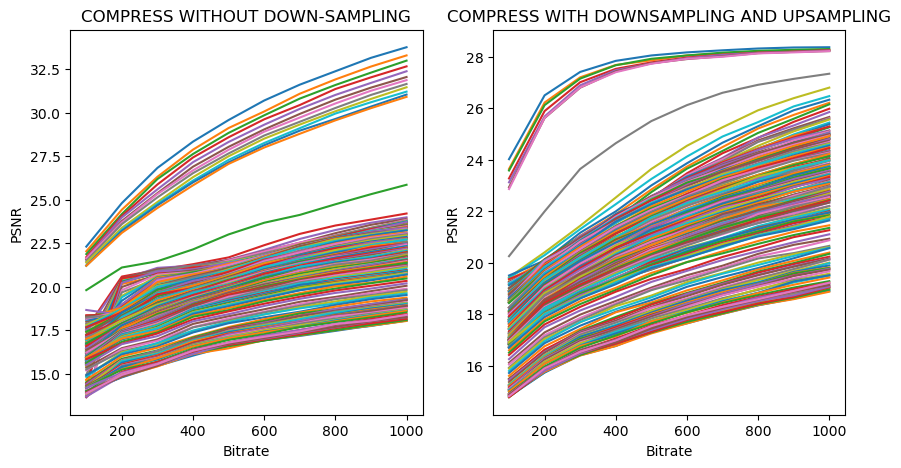

In [65]:
plot_vmaf_psnr(psnr_values, psnr_values_upsampled)

IN THE ABOVE FIGURE PSNR VALUES AT DIFFERENT BITRATES AND OF DIFFERENT FRAMES(217) ARE SHOWN WITH DIFFERENT LEGENDS

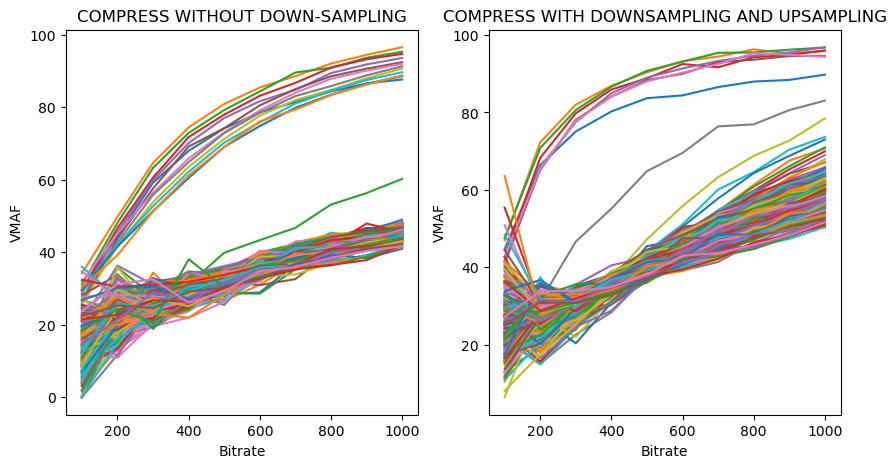

In [66]:
plot_vmaf_psnr(vmaf_values, vmaf_values_upsampled, PSNR=False)

IN THE ABOVE FIGURE VMAF VALUES AT DIFFERENT BITRATES AND OF DIFFERENT FRAMES(217) ARE SHOWN WITH DIFFERENT LEGENDS

In [67]:
#create a plot function taking two arguments and a title
def plot_vmaf_psnr_mean(first,second,title,PSNR=True):
    #plot two lines in the same plot
    #take the mean of the vmaf values
    plt.plot(bitrates, np.mean(first, axis=1), label="COMPRESS WITHOUT DOWN-SAMPLING")
    plt.plot(bitrates, np.mean(second, axis=1), label="COMPRESS WITH DOWNSAMPLING AND UPSAMPLING")
    # plt.plot(bitrates, first, label="COMPRESS WITHOUT DOWN-SAMPLING")
    # plt.plot(bitrates, second, label="COMPRESS WITH DOWNSAMPLING AND UPSAMPLING")
    #set the x axis label
    plt.xlabel("Bitrate")
    #set the y axis label
    if PSNR:
        plt.ylabel("PSNR")
    else:
        plt.ylabel("VMAF")
    #set the title
    plt.title(title)
    #set the legend
    plt.legend()
    #show the plot
    plt.show()

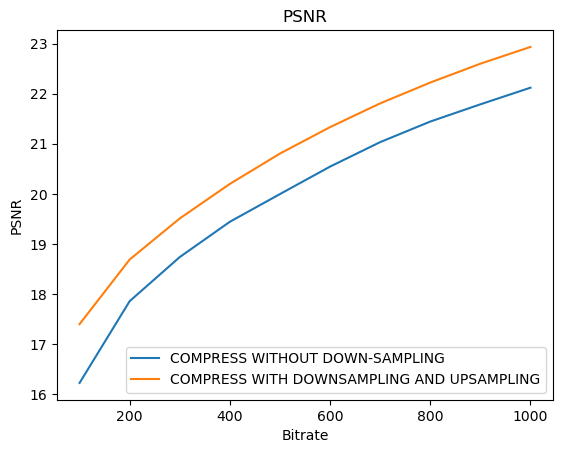

In [68]:
plot_vmaf_psnr_mean(psnr_values, psnr_values_upsampled, "PSNR")

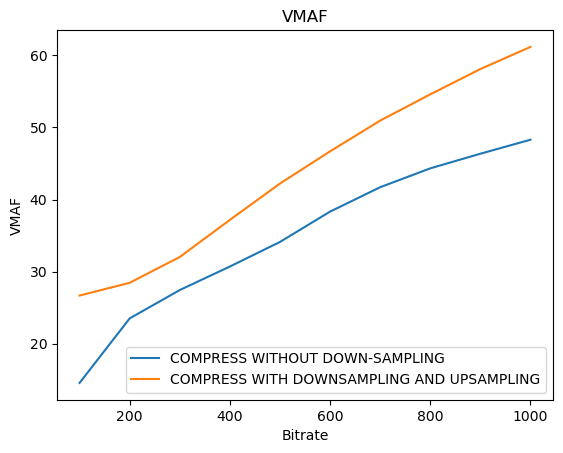

In [69]:
plot_vmaf_psnr_mean(vmaf_values, vmaf_values_upsampled, "VMAF", PSNR=False)